# Deep Learning Fundamentals Assignment 1

Student Name: Hao Liu, Student ID: a1787848

## Data Preprocessing

Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

Read data set from url into dataframe

In [3]:
diabetes_df = pd.read_csv('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes', sep=" ", header=None)

In [4]:
diabetes_df

,0,1,2,3,4,5,6,7,8,9
0,-1,NaN,1:6.000000,2:148.000000,3:72.000000,4:35.000000,5:0.000000,6:33.599998,7:0.627000,8:50.000000
1,1,NaN,1:1.000000,2:85.000000,3:66.000000,4:29.000000,5:0.000000,6:26.600000,7:0.351000,8:31.000000
2,-1,NaN,1:8.000000,2:183.000000,3:64.000000,4:0.000000,5:0.000000,6:23.299999,7:0.672000,8:32.000000
3,1,NaN,1:1.000000,2:89.000000,3:66.000000,4:23.000000,5:94.000000,6:28.100000,7:0.167000,8:21.000000
4,-1,NaN,1:0.000000,2:137.000000,3:40.000000,4:35.000000,5:168.000000,6:43.099998,7:2.288000,8:33.000000
...,...,...,...,...,...,...,...,...,...,...
763,1,NaN,1:10.000000,2:101.000000,3:76.000000,4:48.000000,5:180.000000,6:32.900002,7:0.171000,8:63.000000
764,1,NaN,1:2.000000,2:122.000000,3:70.000000,4:27.000000,5:0.000000,6:36.799999,7:0.340000,8:27.000000
765,1,NaN,1:5.000000,2:121.000000,3:72.000000,4:23.000000,5:112.000000,6:26.200001,7:0.245000,8:30.000000
766,-1,NaN,1:1.000000,2:126.000000,3:60.000000,4:0.000000,5:0.000000,6:30.100000,7:0.349000,8:47.000000


The dataframe is messy, we have to edit the dataframe

In [5]:
diabetes_df = diabetes_df.replace(r'^.+:', '', regex=True)
diabetes_df = diabetes_df.drop(diabetes_df.columns[1], axis=1)
diabetes_df = diabetes_df.apply(pd.to_numeric)
diabetes_df.head()

,0,2,3,4,5,6,7,8,9
0,-1,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,-1,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,-1,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [6]:
diabetes_df.columns =["Target","Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigree","Age"]

In [7]:
diabetes_df.shape[0]

768

There are total 768 instances

In [8]:
diabetes_df.head()

,Target,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,-1,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,-1,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,-1,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


Convert data to Numpy array

In [9]:
# Convert data to Numpy array
diabetes_np = diabetes_df.to_numpy()

In [10]:
diabetes_np.shape

(768, 9)

Split X and y

In [11]:
# Split X and y
y, X = np.split(diabetes_np,[1],axis=1)

Scale target to be 0 or 1

In [12]:
# Scale target to be 0 or 1
y = (y + 1)/2
y = y.astype(int)

Split the data into training set and testing set

In [13]:
#Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Standardize the data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

In [15]:
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

X_train shape: (8, 537)
y_train shape: (1, 537)
X_test shape: (8, 231)
y_test shape: (1, 231)


Now we have complete data preprocessing.

## Perceptron Algorithm

Sigmoid function $\displaystyle S(z) = \frac{1}{1+e^{-z}}$

In [16]:
def sigmoid(z):
    
    
    sigmoid = 1/(1+np.exp(-z))
    
    
    return sigmoid

Initialize $\boldsymbol{w}$ and b

In [17]:
#initialize w1 = 0
def initialize_w_b(dim):
    

    w = np.zeros((dim,1))
    b = 0.0

    return w, b

Calculate cost and gradients: loss function
$\boldsymbol{L}(\boldsymbol{A}, \boldsymbol{Y}) =  - \boldsymbol{Y}  \log(\boldsymbol{A}) - (1-\boldsymbol{Y} )  \log(1-\boldsymbol{Y})$, cost function $C = \frac{1}{m} \sum_{i=1}^m \boldsymbol{L}(\boldsymbol{A}, \boldsymbol{Y})$, $ \frac{\partial {C}}{\partial \boldsymbol{w}} = \frac{1}{m}\boldsymbol{X}(\boldsymbol{A}-\boldsymbol{Y})^T$ and $ \frac{\partial {C}}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\boldsymbol{A}-\boldsymbol{Y})$

In [18]:
#calculate cost and gradient
def propagate(w, b, X, Y):
    
    #m = how many instances
    m = X.shape[1]
    
    
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -1/m*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
 
    dw = 1/m*(np.dot(X,(A-Y).T))
    db = 1/m*(np.sum(A-Y))
    
    cost = np.squeeze(np.array(cost))

    
    gradients = {"dw": dw,
             "db": db}
    
    return gradients, cost

Update $\boldsymbol{w}$ and $b$ by letting $ \boldsymbol{w} = \boldsymbol{w} - \alpha \text{ } \frac{\partial C}{\partial \boldsymbol{w}}$, $ b = b - \alpha \text{ } \frac{\partial C}{\partial b}$. We repeat updating for $t$ times.

In [19]:
def update(w, b, X, Y, num_iterations=10000, learning_rate=0.001):
    
    import copy
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        
        gradients, cost = propagate(w, b, X, Y)
        
        dw = gradients["dw"]
        db = gradients["db"]
        
        w -= dw*learning_rate
        b -= db*learning_rate
        

        costs.append(cost)

    
    parameters = {"w": w,
              "b": b}
    
    gradients = {"dw": dw,
             "db": db}
    
    return parameters, gradients, costs

Once we have our $w$ and $b$, we can predict with given $X$

In [20]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    # Calculate 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
    
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

Combine everything together

In [21]:
def perceptron(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_result=False):
   
    m_train = X_train.shape[0]
    m_test = X_test.shape[0]
    num_px = X_train.shape[1]
    w, b = initialize_w_b(m_train)
    parameters, gradients, costs = update(w, b, X_train, Y_train,num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    
    
    # Print results
    from sklearn import metrics
    precision = metrics.precision_score(np.squeeze(Y_test).T, np.squeeze(Y_prediction_test).T)
    recall = metrics.recall_score(np.squeeze(Y_test).T, np.squeeze(Y_prediction_test).T)
    f1 = metrics.f1_score(np.squeeze(Y_test).T, np.squeeze(Y_prediction_test).T)
    if print_result:
        print("train accuracy: " + str(train_accuracy) + " %")
        print("test accuracy: " + str(test_accuracy) + " %")
        print("Precision: " + str(precision))
        print("Recall: " + str(recall))
        print("f1: " + str(f1))

    
    saved_model = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return saved_model

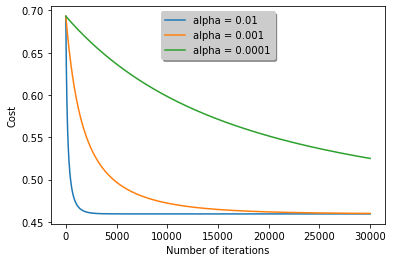

In [49]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for alpha in learning_rates:
    alpha_str = "alpha = "+ str(alpha)
    models[str(alpha_str)] = perceptron(X_train, y_train, X_test, y_test, num_iterations=30000, learning_rate=alpha, print_result=False)

for alpha in learning_rates:
    alpha_str = "alpha = "+ str(alpha)
    plt.plot(np.squeeze(models[str(alpha_str)]["costs"]), label=alpha_str)

plt.ylabel('Cost')
plt.xlabel('Number of iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.80')

plt.savefig(fname = 'alpha_iterations.png',bbox_inches='tight',dpi=300)
plt.show()

We will use learning rate = 0.001 and number of iteration = 30000 for training. 

In [46]:
perceptron_model = perceptron(X_train, y_train, X_test, y_test, num_iterations=30000, learning_rate=0.001, print_result=True)

train accuracy: 77.6536312849162 %
test accuracy: 72.72727272727273 %
Precision: 0.7894736842105263
Recall: 0.7947019867549668
f1: 0.7920792079207921


In [23]:
perceptron_model["w"]

array([[-0.19064971],
       [-1.07690414],
       [ 0.15498031],
       [ 0.03876077],
       [ 0.06819413],
       [-0.77058713],
       [-0.15294576],
       [-0.40121263]])

In [24]:
perceptron_model["b"]

0.844957775366152

Use KNN from sklearn to train

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train.T, np.squeeze(y_train.T))

KNeighborsClassifier()

In [30]:
neigh.score(X_test.T,np.squeeze(y_test.T))

0.7012987012987013

Our perceptron performs better.